# importing packages


In [337]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [338]:
df=pd.read_csv("cyberbullying_tweets.csv")

In [339]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [340]:
df.tail(10)

,tweet_text,cyberbullying_type
47682,But... he’s right. Atlanta is full of so calle...,ethnicity
47683,Black is a color . African American is a Cultu...,ethnicity
47684,"After black soldiers fought in WWI, many of th...",ethnicity
47685,@KeithBishop64 Very true. It was a nice show t...,ethnicity
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,ethnicity
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [341]:
len(df)

47692

In [342]:
df=df.dropna(how='any',axis=0)

In [343]:
len(df)

47692

In [345]:
df['tweet_text']=df['tweet_text'].str.lower()

In [346]:
df.head(5)

,tweet_text,cyberbullying_type
0,"in other words #katandandre, your food was cra...",not_cyberbullying
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying
5,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying
6,itu sekolah ya bukan tempat bully! ga jauh kay...,not_cyberbullying
7,karma. i hope it bites kat on the butt. she is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,rebecca black drops out of school due to bully...,not_cyberbullying


In [347]:
df['tweet_text']=df['tweet_text'].str.replace("&#039;", "")

In [348]:
df['tweet_text']=df['tweet_text'].str.replace(r'[^\x00-\x7F]+',' ')

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_2624/625168614.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text']=df['tweet_text'].str.replace(r'[^\x00-\x7F]+',' ')


In [349]:
df['tweet_text']=df['tweet_text'].str.replace(r'^\s+|\s+?$','')

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_2624/3787078470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text']=df['tweet_text'].str.replace(r'^\s+|\s+?$','')


In [350]:
df['tweet_text']=df['tweet_text'].str.replace(r'\s+',' ')

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_2624/2192518061.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text']=df['tweet_text'].str.replace(r'\s+',' ')


In [351]:
df['tweet_text']=df['tweet_text'].str.replace(r'\.{2,}', ' ')

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_2624/4045222045.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text']=df['tweet_text'].str.replace(r'\.{2,}', ' ')


In [352]:
df.head(10)

,tweet_text,cyberbullying_type
0,"in other words #katandandre, your food was cra...",not_cyberbullying
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying
3,"@jason_gio meh. :p thanks for the heads up, bu...",not_cyberbullying
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying
5,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying
6,itu sekolah ya bukan tempat bully! ga jauh kay...,not_cyberbullying
7,karma. i hope it bites kat on the butt. she is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,rebecca black drops out of school due to bully...,not_cyberbullying


# Text Cleaning

In [353]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [356]:
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [357]:
df.head(30)

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account islam ...,not_cyberbullying
5,quickieleaks yes test god good bad indifferent...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma hope bites kat butt nasty,not_cyberbullying
8,everything mostly priest,not_cyberbullying
9,rebecca black drops school due bullying,not_cyberbullying


In [358]:
df['tweet_text'].replace('  ', np.nan, inplace=True)

In [359]:
len(df)

47692

In [360]:
df = df[df.tweet_text != '']

In [361]:
len(df)

47378

In [362]:
df.head(30)

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account islam ...,not_cyberbullying
5,quickieleaks yes test god good bad indifferent...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma hope bites kat butt nasty,not_cyberbullying
8,everything mostly priest,not_cyberbullying
9,rebecca black drops school due bullying,not_cyberbullying


In [363]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [364]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: lemmatizing(x))

In [365]:
df.head()

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account islam ...,not_cyberbullying


In [366]:
df=df.drop_duplicates('tweet_text')

In [367]:
len(df)

44895

In [368]:
df['label']=df['cyberbullying_type'].apply(lambda x: 0 if x=="not_cyberbullying" else 1)

In [369]:
df.head(5)

,tweet_text,cyberbullying_type,label
0,words katandandre food crapilicious,not_cyberbullying,0
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying,0
2,classy whore red velvet cupcakes,not_cyberbullying,0
3,meh p thanks heads concerned another angry dud...,not_cyberbullying,0
4,isis account pretending kurdish account islam ...,not_cyberbullying,0


In [370]:
df.tail()

,tweet_text,cyberbullying_type,label
47687,black ppl aren expected anything depended anyt...,ethnicity,1
47688,turner withhold disappointment turner called c...,ethnicity,1
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,1
47690,yea fuck therealexel youre nigger fucking unfo...,ethnicity,1
47691,bro gotta chill chillshrammy dog fuck kp dumb ...,ethnicity,1


# Model Building

In [371]:
# model training
x=df.tweet_text
y=df.label

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [372]:
len(x_train)


40405

In [373]:
len(x_test)

4490

In [374]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [375]:
vect=TfidfVectorizer()
clf=LogisticRegression(solver='lbfgs')
from sklearn.pipeline import Pipeline

In [376]:
model=Pipeline([('vectorizer',vect),('classifier',clf)])

In [377]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [378]:
exam=[' u should go and die ']
result=model.predict(exam)

In [379]:
print(result)

[1]


In [380]:
import pickle

In [382]:
pickle.dump(model,open("model_cyber_last.pkl",'wb'))

# Data Visualization


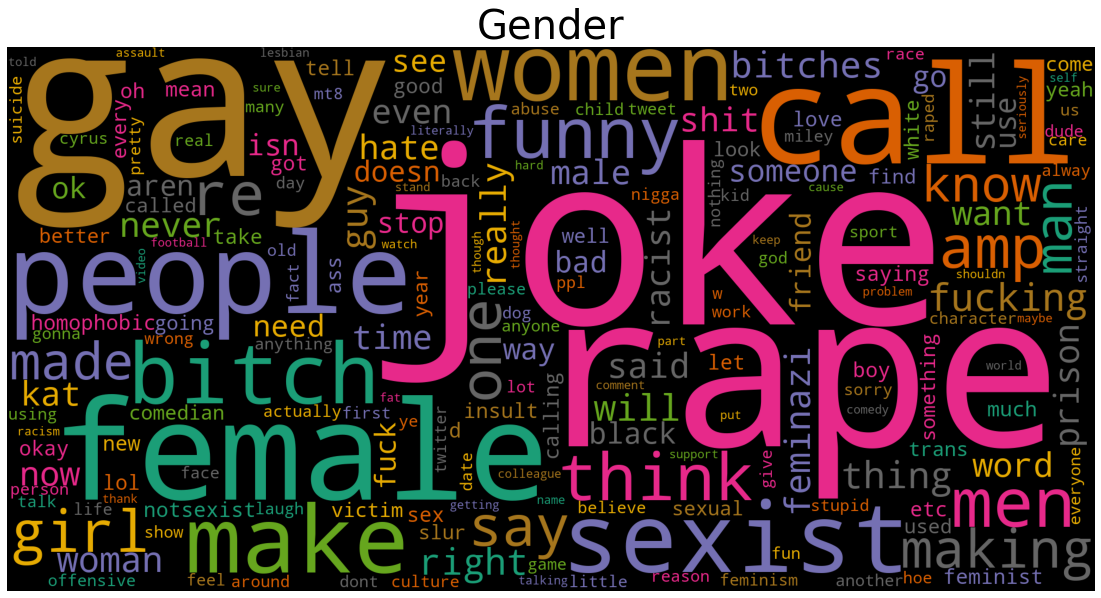

In [383]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

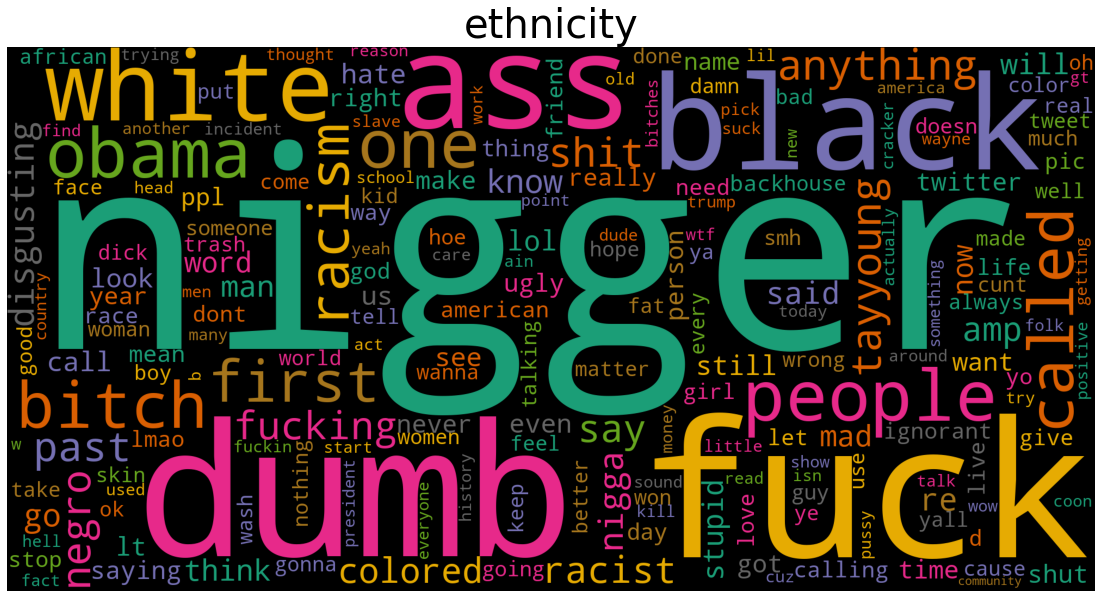

In [385]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='ethnicity']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("ethnicity",fontsize=40)
plt.imshow(cloud1)

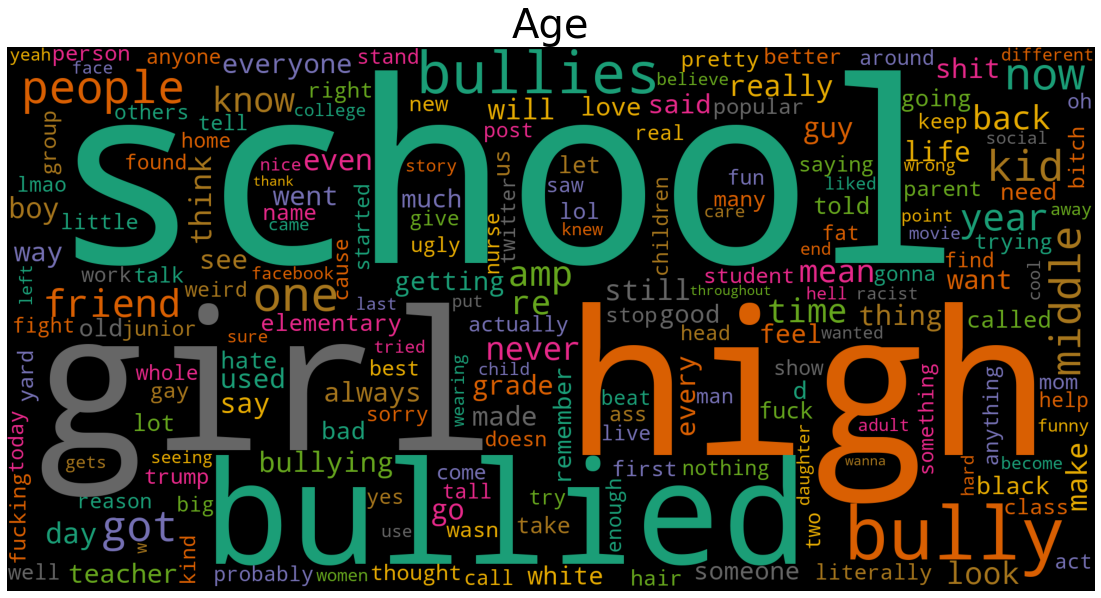

In [389]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='age']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud1)

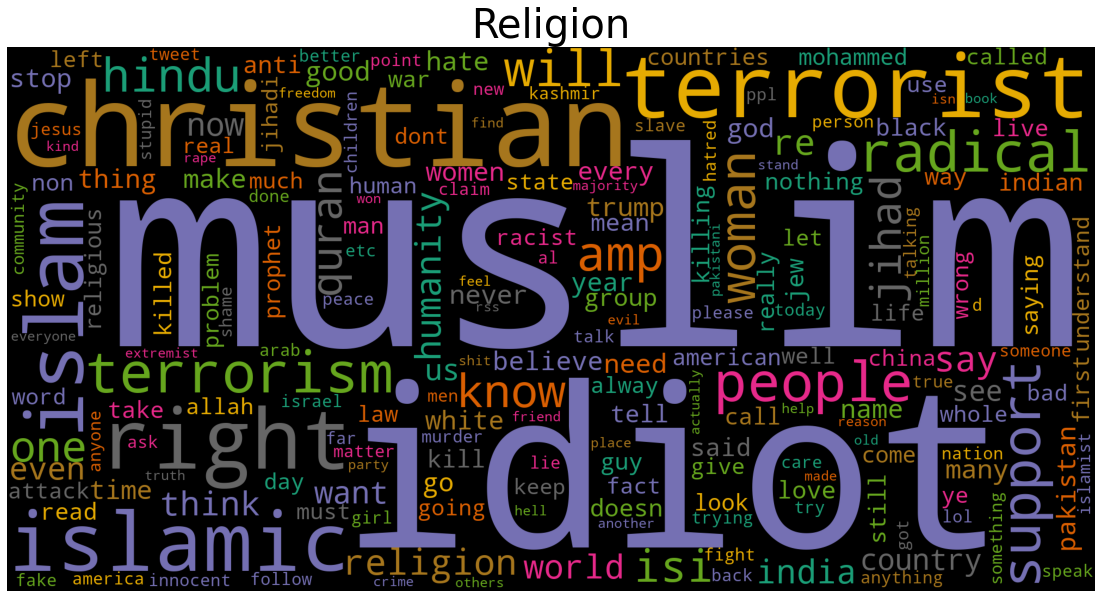

In [390]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='religion']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud1)

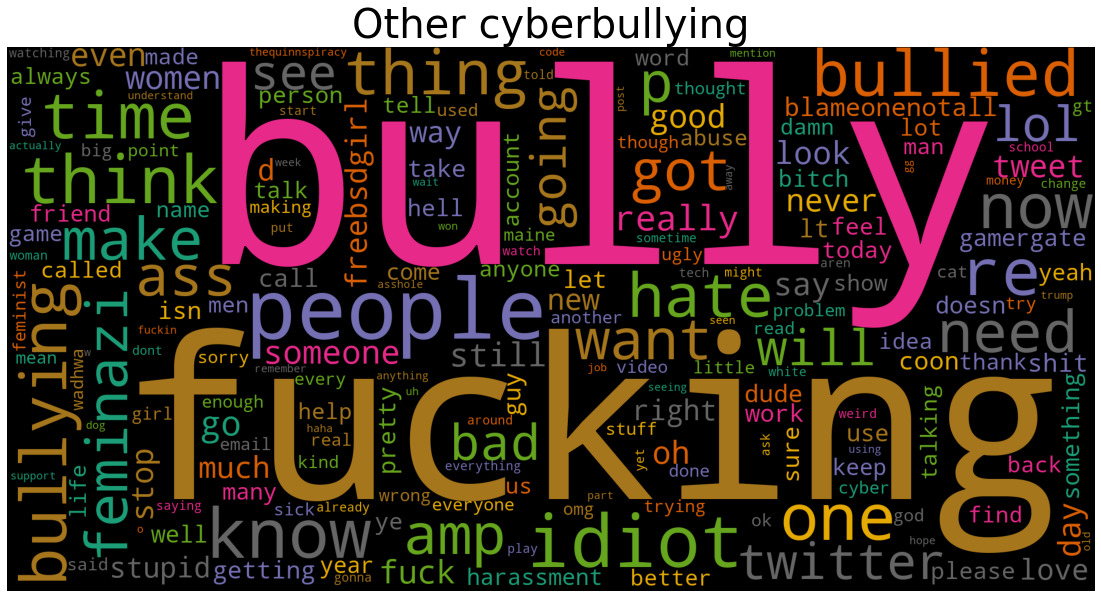

In [391]:
plt.figure(figsize=(20,10))
subset5 = df[df['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("Other cyberbullying",fontsize=40)
plt.imshow(cloud5)

Text(0.5, 1.0, 'Distribution of sentiments')

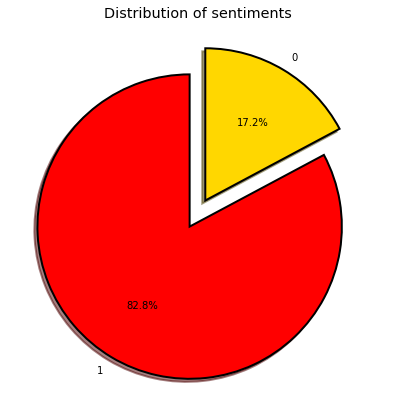

In [387]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')